# Problem Statement

Luggage Bags Cost Prediction

The dataset attached contains the data of 160 different bags associated with ABC industries. The bags have certain attributes which are described below:

Height – The height of the bag
Width – The width of the bag
Length – The length of the bag
Weight – The weight the bag can carry
Weight1 – Weight the bag can carry after expansion
 The company now wants to predict the cost they should set for a new variant of these kinds of bags based on the attributes below. As a result, they want you to build a prediction model which can correctly set the cost of the bag provided the attributes are given. The task involves the following things:

Analyse the dataset and do EDA (Exploratory Data Analysis) – 6 Marks
Plotting of various graphs & correlations – 2 Marks
Model Building using Multiple Linear Regression – 12 Marks
(OLS Approach – 3 Marks, Gradient Descent – 3 Marks,, Mini Batch Gradient – 3 Marks, Stochastic Gradient – 3 Marks)

Evaluation of each model with R squared, RMSE and MSE for the model - 2 Marks
Observations / Conclusions – 2 Marks

Submissions Guidelines

It is individual submission (Need to upload in Canvas
Need to submit one python notebook in Canvass
Need to make the comments / notes wherever required 
NOTE: EDA refers to exploring the dataset from various facets such as outliers, correlations, wrong data types, Null values etc.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import __version__
import chart_studio.plotly as py
import plotly.graph_objs as go
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
import statsmodels.api as sm
from statistics import median
import math

In [2]:
bagsdata = pd.read_csv("AIML_C6_Nov_2021_Data_miniproject.csv")

# Exploratory Data Analysis

In [3]:
#Check the head of customers, and check out its info() and describe() methods
bagsdata.head()

,Cost,Weight,Weight1,Length,Height,Width
0,242.0,23.2,25.4,30,11.5200,4.02
1,290.0,24,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34,12.4440,5.134


In [4]:
bagsdata.describe()

,Cost,Weight1,Height
count,159.000000,159.000000,158.000000
mean,398.326415,28.415723,8.933124
std,357.978317,10.716328,4.273069
min,0.000000,8.400000,1.728400
25%,120.000000,21.000000,5.940600
50%,273.000000,27.300000,7.733000
75%,650.000000,35.500000,12.248700
max,1650.000000,63.400000,18.957000


In [5]:
bagsdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Cost     159 non-null    float64
 1   Weight   159 non-null    object 
 2   Weight1  159 non-null    float64
 3   Length   159 non-null    object 
 4   Height   158 non-null    float64
 5   Width    158 non-null    object 
dtypes: float64(3), object(3)
memory usage: 7.6+ KB


In [6]:
# Here we see some data type are objects hence Converting all Object into float
bagsdata['Weight'] = pd.to_numeric(bagsdata['Weight'],errors = 'coerce')
bagsdata['Length'] = pd.to_numeric(bagsdata['Length'],errors = 'coerce')
bagsdata['Width'] = pd.to_numeric(bagsdata['Width'],errors = 'coerce')

In [7]:
bagsdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Cost     159 non-null    float64
 1   Weight   157 non-null    float64
 2   Weight1  159 non-null    float64
 3   Length   158 non-null    float64
 4   Height   158 non-null    float64
 5   Width    157 non-null    float64
dtypes: float64(6)
memory usage: 7.6 KB


<AxesSubplot:>

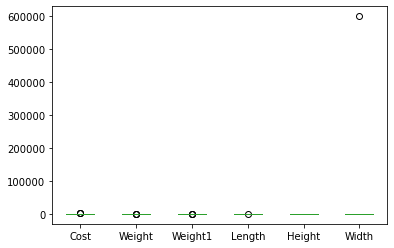

In [8]:
# Generating boxplot to findout ouliers, it shows Width column has an outlier
bagsdata.plot(kind='box')

# exploring the dataset from various facets such as outliers, correlations, wrong data types, Null values 
1) Cost Column have value as =zero in line 40
2) Weight Column have # and & at line 9 and 49 respectively
3) Weight1 column is clean
4) Length Column have '$' at line 56
5) Height Column have null value at line 14
6) Width column have U, outlier=600000 and null value at line 5, 142, 148

# Setting Cost value as nan where it is 0 at line 40
# Setting outlier in Width Column as nan at line 142

In [9]:
bagsdata.iloc[40,0] = np.nan # Set cost at line 40 as NaN
bagsdata.iloc[142,5] = np.nan # Set outlier in width column at line 142 as NaN

# Setting mean value for nan
# Setting median value for the cost =0

In [10]:
bagsdata['Weight'] = bagsdata['Weight'].fillna((bagsdata['Weight'].mean())) 
bagsdata['Cost'] = bagsdata['Cost'].fillna((bagsdata['Cost'].median())) 
bagsdata['Length'] = bagsdata['Length'].fillna((bagsdata['Length'].mean()))
bagsdata['Height'] = bagsdata['Height'].fillna((bagsdata['Height'].mean()))
bagsdata['Width'] = bagsdata['Width'].fillna((bagsdata['Width'].mean()))

In [11]:
bagsdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Cost     159 non-null    float64
 1   Weight   159 non-null    float64
 2   Weight1  159 non-null    float64
 3   Length   159 non-null    float64
 4   Height   159 non-null    float64
 5   Width    159 non-null    float64
dtypes: float64(6)
memory usage: 7.6 KB


In [12]:
bagsdata.columns

Index(['Cost', 'Weight', 'Weight1', 'Length', 'Height', 'Width'], dtype='object')

In [13]:
bagsdata.isnull().sum()

Cost       0
Weight     0
Weight1    0
Length     0
Height     0
Width      0
dtype: int64

<AxesSubplot:xlabel='Weight', ylabel='Density'>

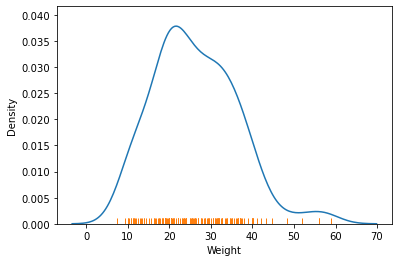

In [14]:
sns.kdeplot(bagsdata['Weight'])
sns.rugplot(bagsdata['Weight'])

<AxesSubplot:>

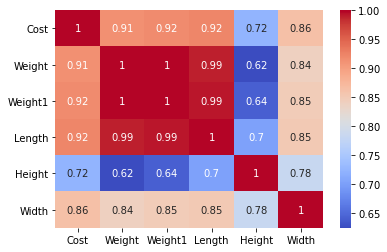

In [15]:
sns.heatmap(bagsdata.corr(),cmap='coolwarm',annot=True)
#As per below heatmap the cost will majorly depend on Height, Width, Weight, Weight1 and Length variables

In [16]:
bagsdata.describe()

,Cost,Weight,Weight1,Length,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,400.096855,26.259873,28.415723,31.239241,8.933124,4.422621
std,356.689642,9.989113,10.716328,11.609227,4.259525,1.662228
min,5.900000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,122.500000,19.050000,21.000000,23.150000,5.944800,3.401600
50%,281.500000,25.400000,27.300000,30.000000,7.786000,4.305600
75%,650.000000,32.700000,35.500000,39.650000,12.143400,5.574750
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


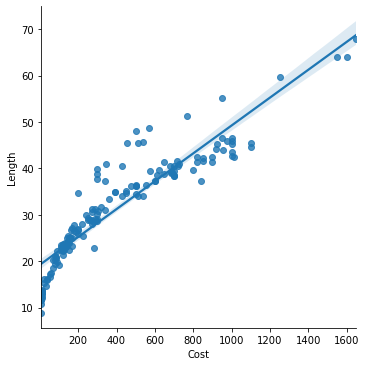

In [17]:
sns.lmplot(x='Cost',y='Length',data=bagsdata)

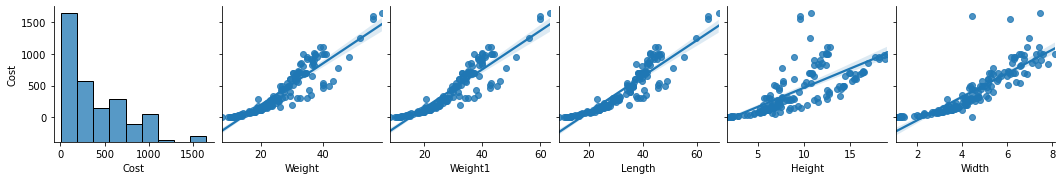

In [18]:
sns.pairplot(bagsdata, kind = 'reg', y_vars = 'Cost')  

In [19]:
bagsdata.iplot(kind='scatter',x='Cost',y='Weight1',mode='markers',size=10)

In [20]:
bagsdata.iplot(kind='scatter',x='Cost',y='Weight',mode='markers',size=10)

In [21]:
bagsdata.iplot(kind='scatter',x='Cost',y='Length',mode='markers',size=10)

In [22]:
bagsdata.iplot(kind='scatter',x='Cost',y='Height',mode='markers',size=10)

In [23]:
bagsdata.iplot(kind='scatter',x='Cost',y='Width',mode='markers',size=10)

# OLS Model

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
y = bagsdata['Cost']

In [26]:
X = bagsdata[['Weight','Weight1','Length','Height','Width']]

In [27]:
X = sm.add_constant(X)

In [28]:
X_train, X_test, y_train, y_test = train_test_split( X,y,train_size = 0.7,random_state = 100 )

In [29]:
# OLS Model
df_lm = sm.OLS( y_train, X_train).fit()

In [30]:
print( df_lm.params )

const     -521.560927
Weight      10.935986
Weight1     47.049141
Length     -29.515303
Height      23.676717
Width        2.119214
dtype: float64


In [31]:
# Regression Model Summary
df_lm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.881    
Dependent Variable: Cost             AIC:                1397.4959
Date:               2021-12-01 10:31 BIC:                1413.7531
No. Observations:   111              Log-Likelihood:     -692.75  
Df Model:           5                F-statistic:        164.1    
Df Residuals:       105              Prob (F-statistic): 5.91e-48 
R-squared:          0.887            Scale:              16312.   
------------------------------------------------------------------
              Coef.   Std.Err.    t     P>|t|    [0.025    0.975] 
------------------------------------------------------------------
const       -521.5609  35.7919 -14.5720 0.0000 -592.5297 -450.5921
Weight        10.9360  22.7358   0.4810 0.6315  -34.1449   56.0169
Weight1       47.0491  27.7972   1.6926 0.0935   -8.0676  102.1659
Length       -29.5153  17.7279  -1.6649 0.0989  -64.6664    5.6358
Height        23.6767   8.7708   2.6995 0.0081    6.2858   41.0677
Width          2.1192  20.3666   0.1041 0.9173  -38.2640   42.5024
------------------------------------------------------------------
Omnibus:               2.649        Durbin-Watson:           1.922
Prob(Omnibus):         0.266        Jarque-Bera (JB):        2.058
Skew:                  0.285        Prob(JB):                0.357
Kurtosis:              3.347        Condition No.:           167  
==================================================================

"""

In [32]:
print('Mean Square Error',df_lm.mse_total)
print('Residual Error',df_lm.mse_resid)

Mean Square Error 137248.8904881245
Residual Error 16311.702799844716


# Observation and Conclusion for OLS : 
Cost  = -521.5 + 10.9(Weight) + 47.04(Weight1) -29.5(Length) +23.6(Height) +2.1(Width)
R Square value is 0.887 which means prediction accuracy is 88.7%

Business Context: 
Here We have build a model to predict the Cost of the Bag based on number of different features 
1) The coefficient 10.9(weight) is representing that with 1 unit increase in weight and keeping all other factors same as before will increase the cost by 10.9 units

2) Mean Squared Error and Root Mean Squared Error: shows how fit our regression model is, the lower the number the better the model. The formula to calculate is MSE=1/n((summation of squareof(yi - y^i)) where i = 1 to n and yi is the actual value where as y^i is predicted value

# Linear Regression Model

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
lm = LinearRegression()

In [35]:
y = bagsdata['Cost']
X = bagsdata[['Weight','Weight1','Length','Height','Width']]
X_train, X_test, y_train, y_test = train_test_split( X,y,train_size = 0.7,random_state = 100 )

In [36]:
lm.fit(X_train,y_train)

LinearRegression()

In [37]:
# The coefficients and Intercept
print('Coefficients: \n', lm.coef_)
print('Intercept: \n', lm.intercept_)

Coefficients: 
 [ 10.9359858   47.04914081 -29.51530252  23.67671676   2.11921357]
Intercept: 
 -521.5609267626129


In [38]:
predictions = lm.predict( X_test)

Text(0, 0.5, 'Predicted Y')

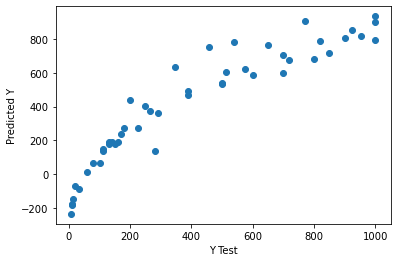

In [39]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [40]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 102.16233948919808
MSE: 15821.455548880636
RMSE: 125.78336753673213


In [41]:
SST = ((y_test-(y_test.mean()))**2).sum()
SSE = ((y_test-predictions)**2).sum()
r2 = (SST-SSE)/SST
print('RSquare = ',r2)

RSquare =  0.8480109057210199


# Observation and Conclusion for Linear Regression Model : 
Cost = -521.5 + 10.9359858(Weight)+47.04914081(Weight1)-29.51530252(Length)+23.67671676(Height)+2.11921357(Width)
R Square value is 0.848 which means prediction accuracy is 84.8%

Business Context: 
Here We have build a model to predict the Cost of the Bag based on number of different features 
1) The coefficient 10.93(weight) is representing that with 1 unit increase in weight and keeping all other factors same as before will increase the cost by 10.93 units

2) Mean Squared Error and Root Mean Squared Error: shows how fit our regression model is, the lower the number the better the model. The formula to calculate is MSE=1/n((summation of squareof(yi - y^i)) where i = 1 to n and yi is the actual value where as y^i is predicted value

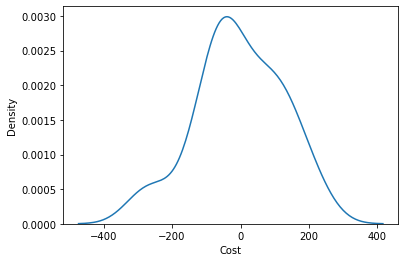

In [42]:
sns.kdeplot((y_test-predictions));

# Gradient Descent Algorithm

In [43]:
X = bagsdata.values[:, 1:6]  # get input values from Weight,Weight1,Length,Height,Width columns
y = bagsdata.values[:, 0]  # get output values from "Cost" coulmn
n = len(y) # Number of training examples
print('Total no of training examples (n) = %s \n' %(n))
# using hstack() function from numpy to add column of ones to X feature 
X = np.hstack((np.ones((n,1)), X))
# Show  records
for i in range(159):
    print('x =', X[i, ], ', y =', y[i])
theta = np.zeros(6)  

y_pred = np.dot(X,theta)
y_pred

Total no of training examples (n) = 159 

x = [ 1.   23.2  25.4  30.   11.52  4.02] , y = 242.0
x = [ 1.     24.     26.3    31.2    12.48    4.3056] , y = 290.0
x = [ 1.     23.9    26.5    31.1    12.3778  4.6961] , y = 340.0
x = [ 1.     26.3    29.     33.5    12.73    4.4555] , y = 363.0
x = [ 1.    26.5   29.    34.    12.444  5.134] , y = 430.0
x = [ 1.         26.8        29.7        34.7        13.6024      4.42262051] , y = 450.0
x = [ 1.     26.8    29.7    34.5    14.1795  5.2785] , y = 500.0
x = [ 1.   27.6  30.   35.   12.67  4.69] , y = 390.0
x = [ 1.     27.6    30.     35.1    14.0049  4.8438] , y = 450.0
x = [ 1.         26.25987261 30.7        36.2        14.2266      4.9594    ] , y = 500.0
x = [ 1.     28.4    31.     36.2    14.2628  5.1042] , y = 475.0
x = [ 1.     28.7    31.     36.2    14.3714  4.8146] , y = 500.0
x = [ 1.     29.1    31.5    36.4    13.7592  4.368 ] , y = 500.0
x = [ 1.     29.5    32.     37.3    13.9129  5.0728] , y = 340.0
x = [ 1.        

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.])

In [44]:
def compute_cost(X, y, theta):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1/(2 * n) * np.sum(sqrErrors)
    return J

In [45]:
iterations = 600000 # epochs
# We need theta parameter for every input variable. since we have 6 input variable including w0 (column of ones)
theta = np.zeros(6)  
eta = 0.0001;
def gradient_descent(X,y,theta,eta,iterations):    
    # This will be our final X matrix (feature matrix)    
    n = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,6))
    for i in range(iterations):
        y_pred = X.dot(theta) # dot product of X and theta which will give 9*17 =153 matrix, 
                              # this matrix will change based on learning rate 
        errors = np.subtract(y_pred, y) #y-y_pred in the form of Matrices
        sum_delta = (eta / n) * X.transpose().dot(errors);
        theta = theta - sum_delta;
        theta_history[i,:] = theta.T
        cost_history[i] = compute_cost(X, y, theta)  
    return theta, cost_history,theta_history
        
theta, cost_history,theta_history = gradient_descent(X,y,theta,eta,iterations)
print('Final value of theta =', theta)
print('First 5 values from cost_history =', cost_history[:5])
print('Last 5 values from cost_history =', cost_history[-5:])
print('RMSE:', np.sqrt(cost_history[-1]))
SST = ((y-(y.mean()))**2).sum() #Total sum of squares
SSE = ((y-(X.dot(theta)))**2).sum() # Residual sum of squares
r2 = (SST-SSE)/SST
print('RSquare = ',r2)


Final value of theta = [-504.36283233   11.39812502   37.56143652  -24.57139315   24.09098405
   20.41598406]
First 5 values from cost_history = [83314.9658946  53346.09894165 38361.37725238 30868.65655881
 27121.90078439]
Last 5 values from cost_history = [7503.32549022 7503.32548909 7503.32548796 7503.32548683 7503.3254857 ]
RMSE: 86.6217379512932
RSquare =  0.8813021583502791


# Conclusion and Observation :  Plot the cost history over iterations
Cost = -504.3 +11.39(Weight)+37.56143652(Weight1)-24.57139315(Length)+24.09098405(Height)+20.41598406(Width)
MSE = 7503.3254857
Root Mean Square Error = 86.6
R Square value for Gradient Descent Algorith is 0.881 which means it prediction accuracy is 88.1%
Business Context: 
Here We have build a model to predict the Cost of the Bag based on number of different features 
1) The coefficient 11.39(weight) is representing that with 1 unit increase in weight and keeping all other factors same as before will increase the cost by 11.39 units

2) Mean Squared Error and Root Mean Squared Error: shows how fit our regression model is, the lower the number the better the model. The formula to calculate is MSE=1/n((summation of squareof(yi - y^i)) where i = 1 to n and yi is the actual value where as y^i is predicted value

Text(0.5, 1.0, 'Convergence of gradient descent')

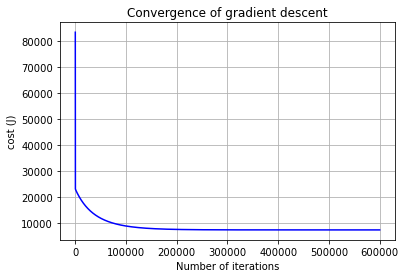

In [46]:
plt.plot(range(1, iterations+1),cost_history,color ='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("cost (J)")
plt.title("Convergence of gradient descent")

# Zoom: After around 10 iterations the cost function value is flat so the remaining iterations are not needed or will not result in any further optimization.

Text(0.5, 1.0, 'Convergence of gradient descent')

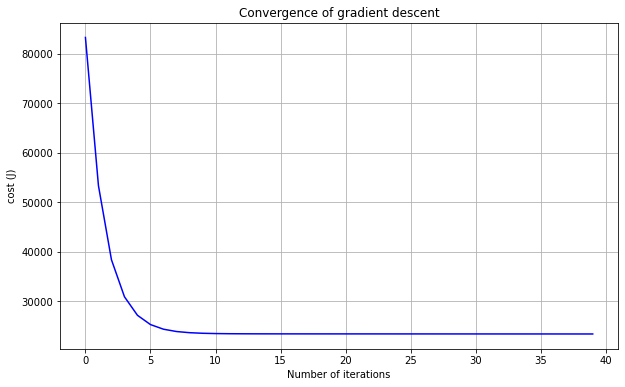

In [47]:
# Zooming in for the 40 iterations
plt.plot(range(40),cost_history[:40],color ='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("cost (J)")
plt.title("Convergence of gradient descent")

Text(0.5, 1.0, 'Convergence of gradient descent')

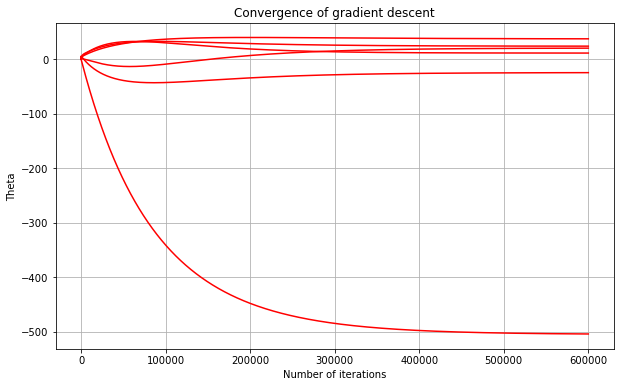

In [48]:
# Change in theta values 
plt.plot(range(1, iterations+1),theta_history,color ='red')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("Theta")
plt.title("Convergence of gradient descent")

# Mini Batch Gradient Descent

In [49]:
iterations = 100000
#theta = np.random.randn(6,1)
theta = np.zeros(6)
eta = 0.001;
batch_size =10
def minibatch_gradient_descent(X,y,theta,eta,iterations,batch_size):
    cost_history = np.zeros(iterations)
    n_batches = int(n/batch_size)
    for it in range(iterations):
        cost =0.0
        indices = np.random.permutation(n)
        X = X[indices]
        y = y[indices]
        for i in range(0,n,batch_size):
            X_i = X[i:i+batch_size]
            y_i = y[i:i+batch_size]            
            prediction = np.dot(X_i,theta) ## dot product of X and theta 
            theta = theta - (1/n)*eta*( X_i.transpose().dot((np.subtract(prediction,y_i))))
            cost = cost + compute_cost(X_i,y_i,theta)
        cost_history[it]  = cost
        
    return theta, cost_history

theta,cost_history = minibatch_gradient_descent(X,y,theta,eta,iterations,batch_size)
print(theta)
print('Theta0:          {:0.3f},\nTheta1:          {:0.3f},\nTheta2:          {:0.3f},\nTheta3:          {:0.3f},\nTheta4:          {:0.3f},\nTheta5:          {:0.3f}'.format(theta[0],theta[1],theta[2],theta[3],theta[4],theta[5]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))
print('RMSE:', np.sqrt(cost_history[-1]))
SST = ((y-(y.mean()))**2).sum() #Total sum of squares
SSE = ((y-(X.dot(theta)))**2).sum() # Residual sum of squares
r2 = (SST-SSE)/SST
print('RSquare = ',r2)

[-506.19860641   11.20529712   37.49566919  -24.49035147   23.94711768
   20.50712378]
Theta0:          -506.199,
Theta1:          11.205,
Theta2:          37.496,
Theta3:          -24.490,
Theta4:          23.947,
Theta5:          20.507
Final cost/MSE:  7344.734
RMSE: 85.70142606668546
RSquare =  0.8808733588179937


# Conclusion and Observation :Plot the cost history over iterations
Cost = -506.21200061 + 11.17065452(Weight)+37.53212475(Weight1)-24.50172694(Length)+23.97998952(Height)+20.52068108(Width)
MSE = 7338.679
Root Mean Square Error = 85.66
R Square value for Mini Batch Gradient Descent Algorithm is 0.8808 which means it prediction accuracy is 88.08%
Business Context: 
Here We have build a model to predict the Cost of the Bag based on number of different features 
1) The coefficient 11.17065452(weight) is representing that with 1 unit increase in weight and keeping all other factors same as before will increase the cost by 11.17 units

2) Mean Squared Error and Root Mean Squared Error: shows how fit our regression model is, the lower the number the better the model. The formula to calculate is MSE=1/n((summation of squareof(yi - y^i)) where i = 1 to n and yi is the actual value where as y^i is predicted value

Text(0.5, 1.0, 'Convergence of Mini Batch gradient descent')

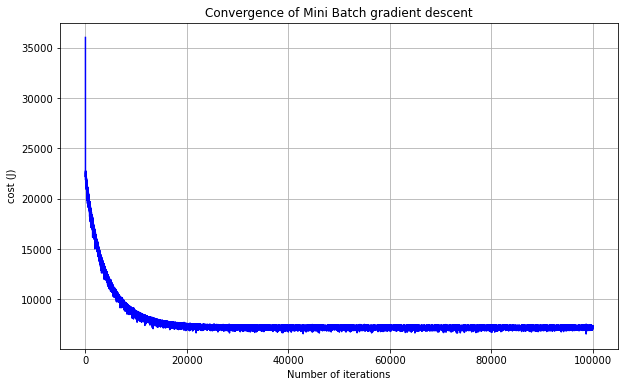

In [50]:
plt.plot(range(1, iterations+1),cost_history,color ='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("cost (J)")
plt.title("Convergence of Mini Batch gradient descent")

Text(0.5, 1.0, 'Convergence of gradient descent')

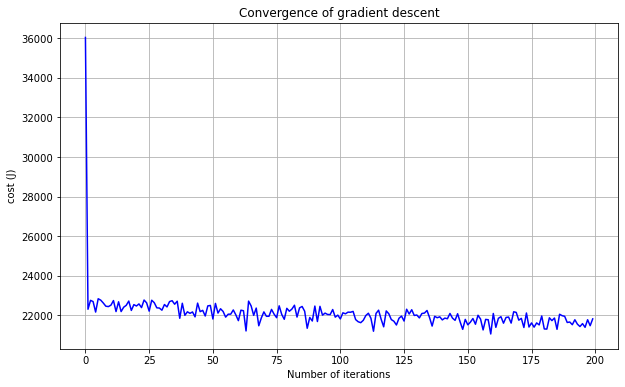

In [51]:
# Zooming in for the 200 iterations
plt.plot(range(200),cost_history[:200],color ='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("cost (J)")
plt.title("Convergence of gradient descent")

# Stochastic gradient descent

In [52]:
from sklearn.linear_model import SGDRegressor

In [53]:
X = bagsdata.values[:, 1:6]  # get input values from Weight,Weight1,Length,Height,Width columns
y = bagsdata.values[:, 0]  # get output values from "Cost" coulmn
reg = SGDRegressor(max_iter=400000,tol=0.00001,eta0=1e-3)
reg.fit(X,y)

SGDRegressor(eta0=0.001, max_iter=400000, tol=1e-05)

In [54]:
print('Coefficient obtained: ', reg.coef_)
print('Intercept Obtained: ', reg.intercept_)

Coefficient obtained:  [11.52307604  8.29737337 -7.47950403 12.60932697  4.69227219]
Intercept Obtained:  [-31.04955162]


In [55]:
y_pred = reg.predict(X)
mse = metrics.mean_squared_error(y,y_pred)
rmse = math.sqrt(mse)
r2_score = reg.score(X,y)
print('MSE: ',mse)
print('RMSE: ', rmse)
print('R^2: ', r2_score)

MSE:  44709.02999041196
RMSE:  211.44509923479418
R^2:  0.6463657765995423


# Conclusion and Observation :
Cost = -32.66 + 10.77566098(Weight)+8.46281419(Weight1)-5.66628075(Length)+11.41200216(Height)-0.02833226(Width)
MSE = 43617.22
Root Mean Square Error = 208.84
R Square value for Stocashtic Gradient Descent Algorithm is 0.655 which means it prediction accuracy is 65.5%
Business Context: 
Here We have build a model to predict the Cost of the Bag based on number of different features 
1) The coefficient 10.77566098(weight) is representing that with 1 unit increase in weight and keeping all other factors same as before will increase the cost by 10.7 units

2) Mean Squared Error and Root Mean Squared Error: shows how fit our regression model is, the lower the number the better the model. The formula to calculate is MSE=1/n((summation of squareof(yi - y^i)) where i = 1 to n and yi is the actual value where as y^i is predicted value